In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # 使用cpu训练

### 参考torch.optim.Adam

In [2]:
mnist = np.load("../../../../../Other/datasets/NumPy/mnist.npz")
X_train, y_train, X_test, y_test = tf.cast(tf.expand_dims(tf.constant(mnist['x_train']), -1), tf.float32), tf.constant(mnist['y_train']), tf.cast(
    tf.expand_dims(
        tf.constant(mnist['x_test']), -1), tf.float32), tf.constant(mnist['y_test'])

# 归一化
X_train, X_test = X_train / 255.0, X_test / 255.0

In [3]:
model = Sequential([
    layers.Conv2D(6, 3, activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='relu'),
])

In [4]:
'''
Adam默认参数:
tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam', **kwargs
)
'''
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,  # 对应torch.optim.Adam lr参数
                                                 beta_1=0.9, beta_2=0.999,  # 对应torch.optim.Adam betas参数
                                                 epsilon=1e-07),  # 对应torch.optim.Adam eps参数
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [5]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8819 - accuracy: 0.6550 - val_loss: 0.7762 - val_accuracy: 0.6743
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7745 - accuracy: 0.6772 - val_loss: 0.7760 - val_accuracy: 0.6762
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7583 - accuracy: 0.6801 - val_loss: 0.7602 - val_accuracy: 0.6797
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7500 - accuracy: 0.6817 - val_loss: 0.7579 - val_accuracy: 0.6792
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7440 - accuracy: 0.6827 - val_loss: 0.7527 - val_accuracy: 0.6806
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7397 - accuracy: 0.6837 - val_loss: 0.7558 - val_accuracy: 0.6786
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7363 - accuracy: 0.6842 - val_loss: 0.7622 - val_accuracy:

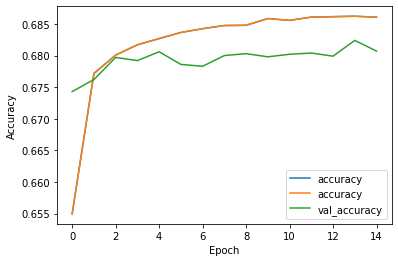

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1